# Quadratic Regression Dataset - Linear Regression vs. XGBoost
Comparing Linear Regression and XGBoost in a non-linear dataset.

This Jupyter Notebook uses Amazon's Elastic Interface *conda*, updated to *TensorFlow 2.0* in *Python 3.6.7*

Find table versions at the bottom of notebook.

## Check for Required Libraries (Optional)

In [ ]:
!conda list numpy
!conda list pandas
!conda list matplotlib
!conda list python
!conda list tensorflow

## Install Missing Packages (Optional)

In [ ]:
# conda install <package> -y -c conda-forge
!conda install tensorflow==2.0 -y -c conda-forge

## Install XGBoost into the Notebook

In [ ]:
!conda install xgboost -y -c conda-forge

## Import libraries

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# XGBoost
import xgboost as xgb
# Linear Regression
from sklearn.linear_model import LinearRegression

## Read Quadratic Dataset

Call infromation from *quadraticAll.csv*

In [2]:
df = pd.read_csv('quadraticAll.csv')

In [3]:
df.head() # value check

,x,y
0,-20.0,2473.236825
1,-19.8,2405.673895
2,-19.6,2444.523136
3,-19.4,2320.437236
4,-19.2,2288.088295


### Plotting the first target

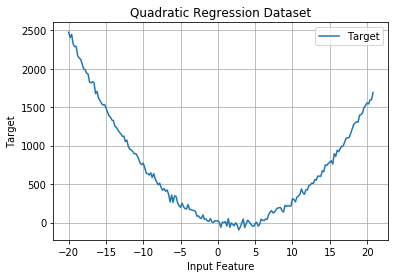

In [4]:
plt.plot(df.x,df.y,label='Target')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Quadratic Regression Dataset')
plt.show()

In [5]:
train_file = 'quadratic_train.csv'
validation_file = 'quadratic_validation.csv'

# specify column names, since there are no headers in the files
df_train = pd.read_csv(train_file,names=['y','x'])
df_validation = pd.read_csv(validation_file,names=['y','x'])

In [6]:
df_train.head() # data check

,y,x
0,1437.374327,-14.8
1,-15.668625,4.4
2,1213.494519,18.0
3,922.663154,-11.4
4,358.480992,-6.2


### Scatter Plot Training, Validation Datasets

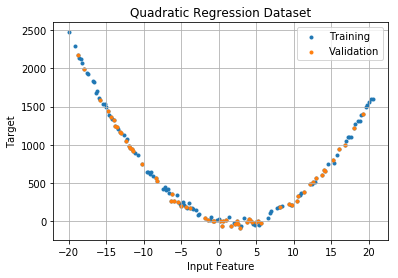

In [7]:
plt.scatter(df_train.x,df_train.y, label='Training', marker='.')
plt.scatter(df_validation.x,df_validation.y, label='Validation', marker='.')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.title('Quadratic Regression Dataset')
plt.legend()
plt.show()

### Prepare Datasets for Regressors
Pay attention to column markers (:)

In [8]:
# Reminder Python indices start @ 0
X_train = df_train.iloc[:,1:] # Features in the 2nd column to the end
y_train = df_train.iloc[:,0].ravel() # Target: 1st (0th) column, then flattened

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

### Create an XGBoost Instance

For this project, I loaded XGBoost configured for regressor with squared loss *(objective='reg:squarederror')*

Parameters page found [here](https://github.com/dmlc/xgboost/blob/master/doc/parameter.rst)

In [11]:
regressor = xgb.XGBRegressor(objective='reg:squarederror')

regressor # display current settings

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

### Fit Regressor to Dataset

In [12]:
regressor.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-rmse:869.603	validation_1-rmse:711.589
[1]	validation_0-rmse:791.625	validation_1-rmse:648.226
[2]	validation_0-rmse:720.706	validation_1-rmse:588.526
[3]	validation_0-rmse:656.685	validation_1-rmse:536.031
[4]	validation_0-rmse:597.67	validation_1-rmse:486.695
[5]	validation_0-rmse:544.342	validation_1-rmse:440.9
[6]	validation_0-rmse:497.244	validation_1-rmse:404.041
[7]	validation_0-rmse:453.641	validation_1-rmse:367.697
[8]	validation_0-rmse:413.344	validation_1-rmse:334.154
[9]	validation_0-rmse:377.866	validation_1-rmse:305.403
[10]	validation_0-rmse:344.76	validation_1-rmse:276.599
[11]	validation_0-rmse:315.375	validation_1-rmse:252.728
[12]	validation_0-rmse:288.477	validation_1-rmse:229.76
[13]	validation_0-rmse:263.42	validation_1-rmse:208.331
[14]	validation_0-rmse:240.529	validation_1-rmse:188.473
[15]	validation_0-rmse:220.115	validation_1-rmse:170.873
[16]	validation_0-rmse:201.136	validation_1-rmse:154.96
[17]	validation_0-rmse:185.113	validation_1-rmse

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

### Plot the Error Results
Previously, one could notice that the RMSE values trended downward. To visualize, plot the errors.

In [13]:
evals_result = regressor.evals_result()

In [14]:
# Training Rounds for the Plot
training_rounds = range(len(evals_result['validation_0']['rmse']))

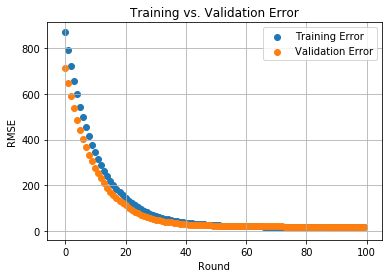

In [15]:
plt.scatter(x=training_rounds,y=evals_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=evals_result['validation_1']['rmse'],label='Validation Error')

plt.grid(True)
plt.xlabel('Round')
plt.ylabel('RMSE')
plt.legend()
plt.title('Training vs. Validation Error')
plt.show()

### XGBoost Feature Importance

*plot_importance* function shows which features were usefule in the model's operation.

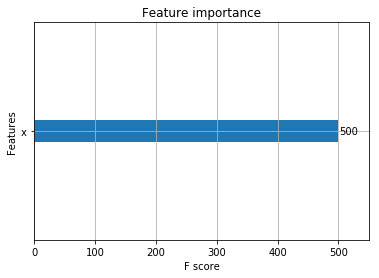

In [16]:
xgb.plot_importance(regressor) # To find which features were useful in the model
plt.show()

In this case, *x* was the only feature. This become more interesting with more complex models.

## Validation Dataset: Compare Actual and Predicted
This section focused on evaluating the performance of the model.

In [17]:
result=regressor.predict(X_validation) # predicted results for plotting

result[:5] # data check

array([1436.2847  ,  -15.541119, 1210.7617  ,  943.13727 ,  307.71094 ],
      dtype=float32)

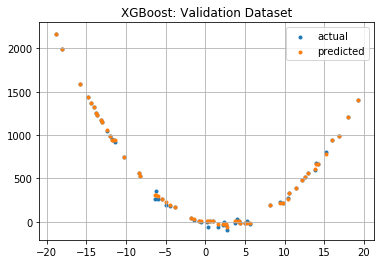

In [18]:
plt.scatter(df_validation.x, df_validation.y, label='actual', marker='.')
plt.scatter(df_validation.x, result, label='predicted', marker='.')
plt.grid(True)
plt.legend()
plt.title('XGBoost: Validation Dataset')
plt.show()

### Display Root Mean Square Metrics

In [19]:
# RMSE Metrics
print('XGBoost Algorithm Metrics')
mse = mean_squared_error(df_validation.y,result)
print(" Mean Squared Error: {0:.2f}".format(mse))
print(" Root Mean Square Error: {0:.2f}".format(mse**.5))

XGBoost Algorithm Metrics
 Mean Squared Error: 296.63
 Root Mean Square Error: 17.22


### Plot XGBoost Residuals Histogram

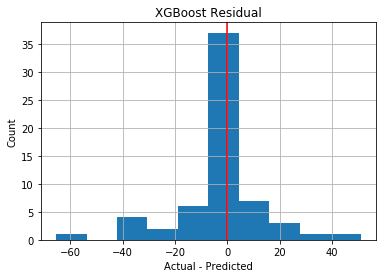

In [20]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = df_validation.y - result
plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('XGBoost Residual')
plt.axvline(color='r')
plt.show()

### Count Residuals Greater Than Zero and Less Than Zero

Residual is also known as a first order term.

In [21]:
value_counts = (residuals > 0).value_counts(sort=False)

print(' Under Estimation: {0}'.format(value_counts[True]))
print(' Over  Estimation: {0}'.format(value_counts[False]))

 Under Estimation: 25
 Over  Estimation: 37


### Plot Dataset

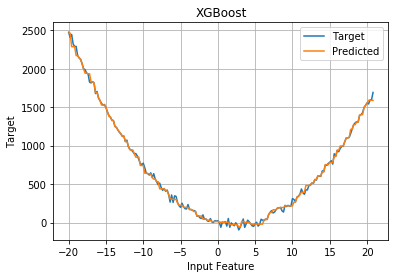

In [22]:
plt.plot(df.x,df.y,label='Target')
plt.plot(df.x,regressor.predict(df[['x']]) ,label='Predicted')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('XGBoost')
plt.show()

Notice, *Predicted* and *Target* are closely plotted.

## Linear Regression Algorithm

In [23]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Compare Weights Assigned by Linear Regression to XGBoost

Recall: Original function was _5x**2 -23x + 47 + random noise_

In [24]:
linear_regressor.coef_

array([-18.3888435])

In [25]:
linear_regressor.intercept_

685.1279620625199

In [26]:
result = linear_regressor.predict(df_validation[['x']])

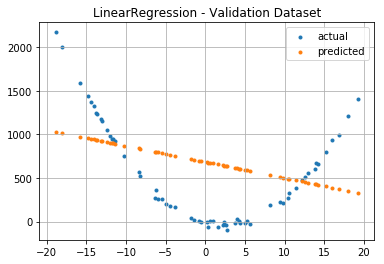

In [27]:
plt.title('LinearRegression - Validation Dataset')
plt.scatter(df_validation.x,df_validation.y,label='actual',marker='.')
plt.scatter(df_validation.x,result,label='predicted',marker='.')
plt.grid(True)
plt.legend()
plt.show()

Clearly, *Linear Regression* is not the correct tool in its current form for this type of data.

### Linear RMSE Metrics

In [28]:
print('Linear Regression Metrics')
mse = mean_squared_error(df_validation.y,result)
print(" Mean Squared Error: {0:.2f}".format(mse))
print(" Root Mean Square Error: {0:.2f}".format(mse**.5))

Linear Regression Metrics
 Mean Squared Error: 286069.90
 Root Mean Square Error: 534.86


### Linear Residual Histogram

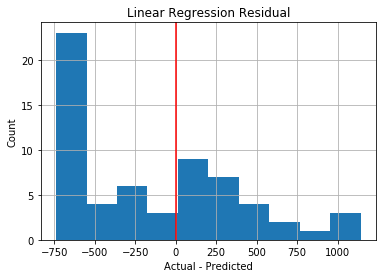

In [29]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = df_validation.y - result
plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Linear Regression Residual')
plt.axvline(color='r')
plt.show()

### Count Values Greater Than Zero and Less Than Zero (Linear)

In [30]:
value_counts = (residuals > 0).value_counts(sort=False)

print(' Under Estimation: {0}'.format(value_counts[True]))
print(' Over  Estimation: {0}'.format(value_counts[False]))

 Under Estimation: 26
 Over  Estimation: 36


### Plot All Dataset vs. Linear Regressor

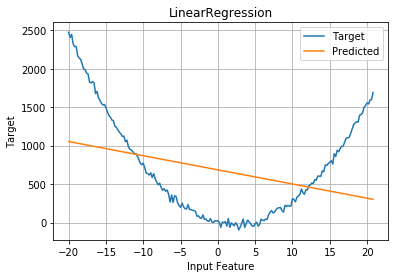

In [31]:
plt.plot(df.x,df.y,label='Target')
plt.plot(df.x,linear_regressor.predict(df[['x']]) ,label='Predicted')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('LinearRegression')
plt.show()

## How Would I Correct This Under-Fitting Issue by Added Relavant Features?

1. What feature will I add and why?
1. Complete the code and Test
1. What performance do I see?

### Reload Dataset for Testing

In [32]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=['y','x'])
df_validation = pd.read_csv(validation_file,names=['y','x'])
df = pd.read_csv('quadraticAll.csv')

### Add New Features (Code Block Area to Coreect Linear Underfit)

In [33]:
# Place holder to add new features to df_train, df_validation and df
# if you need help, scroll down to see the answer
# Add your code












df_train['x2'] = df_train['x']**2

df_validation['x2'] = df_validation['x']**2

df['x2']=df['x']**2





In [34]:
X_train = df_train.iloc[:,1:] # Features: 2nd column onward
y_train = df_train.iloc[:,0] # Taregt: 1st Column (0th)

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [35]:
linear_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
linear_regressor.coef_

array([-23.0940711 ,   4.99583483])

In [37]:
linear_regressor.intercept_

-0.04794651430643171

In [38]:
linear_result = linear_regressor.predict(X_validation)

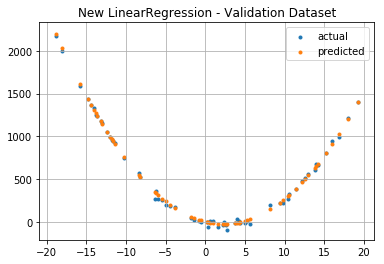

In [39]:
plt.title('New LinearRegression - Validation Dataset')
plt.scatter(df_validation.x,df_validation.y,label='actual',marker='.')
plt.scatter(df_validation.x,linear_result,label='predicted',marker='.')
plt.grid(True)
plt.legend()
plt.show()

### New Linear RMSE Metrics

In [40]:
print('Linear Regression Metrics')
mse = mean_squared_error(df_validation.y,result)
print(" Mean Squared Error: {0:.2f}".format(mse))
print(" Root Mean Square Error: {0:.2f}".format(mse**.5))

print("***This should see an RMSE score of 30.45 or less")

Linear Regression Metrics
 Mean Squared Error: 286069.90
 Root Mean Square Error: 534.86
***This should see an RMSE score of 30.45 or less


In [41]:
df.head() # data check: x, y, x2

,x,y,x2
0,-20.0,2473.236825,400.00
1,-19.8,2405.673895,392.04
2,-19.6,2444.523136,384.16
3,-19.4,2320.437236,376.36
4,-19.2,2288.088295,368.64


In [42]:
### New Plot of Dataset

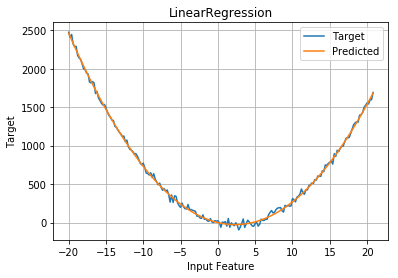

In [43]:
# Plot for entire dataset
plt.plot(df.x,df.y,label='Target')
plt.plot(df.x,linear_regressor.predict(df[['x','x2']]) ,label='Predicted')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('LinearRegression')
plt.show()

### A Solution For Under-Fitting

Add an _x**2_ term to the linear dataframe

In the **code area block:**
```
df_train['x2'] = df_train['x']**2

df_validation['x2'] = df_validation['x']**2

df['x2']=df['x']**2
```

## Tree-Based Algorithms Have Lower/Upper Bounds for Predictions

* XGBoost Prediction has an upper and lower bound (directly applies to tree-based algorithms)
* Linear Regression extrapolates

In [51]:
# Original Function without Noise
def quad_func (x):
    return 5*x**2 -23*x + 47 # remember spaces

### X is outside the training samples' range

Note: new *x2* term is added: x^2

In [54]:
X = np.array([-100,-25,25,1000,5000])
y = quad_func(X)

X = np.array([-100,-25,25,1000,5000])
y = quad_func(X)
df_qf = pd.DataFrame({'x':X,'y':y,'x2':X**2})
df_qf['xgboost']=regressor.predict(df_qf[['x']])
df_qf['linear']=linear_regressor.predict(df_qf[['x','x2']])

In [55]:
df_qf # check

,x,y,x2,xgboost,linear
0,-100,52347,10000,2461.927734,5.226771e+04
1,-25,3747,625,2461.927734,3.699701e+03
2,25,2597,625,1588.235962,2.544997e+03
3,1000,4977047,1000000,1588.235962,4.972741e+06
4,5000,124885047,25000000,1588.235962,1.247804e+08


### Plot

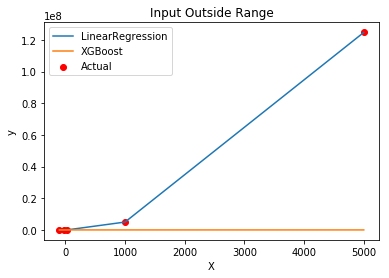

In [56]:
plt.scatter(df_qf.x,df_qf.y,label='Actual',color='r')
plt.plot(df_qf.x,df_qf.linear,label='LinearRegression')
plt.plot(df_qf.x,df_qf.xgboost,label='XGBoost')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Input Outside Range')
plt.show()

### X Inside the Bounds

In [57]:
X = np.array([-15,-12,-5,0,1,3,5,7,9,11,15,18])
y = quad_func(X)
df_qf = pd.DataFrame({'x':X,'y':y,'x2':X**2})
df_qf['xgboost']=regressor.predict(df_qf[['x']])
df_qf['linear']=linear_regressor.predict(df_qf[['x','x2']])

In [58]:
df_qf # data check

,x,y,x2,xgboost,linear
0,-15,1517,225,1499.692261,1470.425956
1,-12,1043,144,991.931213,996.481122
2,-5,287,25,224.965408,240.318280
3,0,47,0,13.276349,-0.047947
4,1,29,1,4.371443,-18.146183
5,3,23,9,-56.117565,-24.367646
6,5,57,25,-18.919676,9.377569
7,7,131,49,131.283005,83.089462
8,9,245,81,217.274094,196.768035
9,11,399,121,363.224792,350.413286


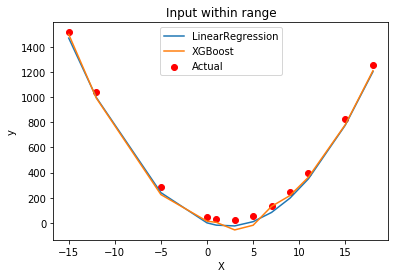

In [59]:
# XGBoost Predictions have an upper bound and lower bound
# Linear Regression Extrapolates
plt.scatter(df_qf.x,df_qf.y,label='Actual',color='r')
plt.plot(df_qf.x,df_qf.linear,label='LinearRegression')
plt.plot(df_qf.x,df_qf.xgboost,label='XGBoost')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Input within range')
plt.show()

# Summary

1. Compared the performance of XGBoost model vs. Linear Regression on a quadratic dataset
1. Showed relationship between input feature and target was non-linear
1. XGBoost handled it pretty well; not unexpectedly, linear regression under-fit the data
1. To assist with underfitting, the feature *x^2* was added to the linear regresstion - improving performance
1. XGBoost can detect non-linear relationships; whereas, algorithms like linear regression may require complex feature engineering

### Major Library Versions Used

| Library | Version |
|---------|:--------:|
| matplotlib | 3.0.3 |
| numpy | 1.18.1 |
| pandas | 0.24.2 |
| python | 3.6.7 |
| tensorflow | 2.0 |
| xgboost | 0.90 |